In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import pandas as pd

In [2]:
# Load the data for counties percentage change of the adoption rates
df = pd.read_csv(
    Path("../../../../../data/processed_data/ev_main_dataset.csv"),
)

# Display the data
print("Shape:", df.shape)
df

Shape: (2011, 10)


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.000013,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.000026,NaN
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540,10,0,78385,0.000010,NaN
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039,2,0,46430,0.000002,NaN
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009,2,0,40089,0.000015,NaN
...,...,...,...,...,...,...,...,...,...,...
2006,2022,TX,Wood County,"[75410, 75444, 75494, 75497, 75765, 75773, 75783]",46930,188,0,61748,0.004006,3.101753
2007,2022,TX,Yoakum County,"[79323, 79355]",7484,10,1,80317,0.001336,9.105559
2008,2022,TX,Young County,"[76372, 76374, 76450, 76460, 76481]",18012,94,0,65565,0.005219,5.688565
2009,2022,TX,Zapata County,"[78067, 78076, 78564]",13838,10,0,35061,0.000723,0.671123


In [3]:
# Convert `ev_adoption_rate` and `ev_growth_rate` to percentages
df["ev_adoption_rate"] = df["ev_adoption_rate"] * 100
df["ev_growth_rate"] = df["ev_growth_rate"] * 100

# Display the data
print("Shape:", df.shape)
df

Shape: (2011, 10)


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.001322,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.002639,NaN
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540,10,0,78385,0.000950,NaN
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039,2,0,46430,0.000215,NaN
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009,2,0,40089,0.001481,NaN
...,...,...,...,...,...,...,...,...,...,...
2006,2022,TX,Wood County,"[75410, 75444, 75494, 75497, 75765, 75773, 75783]",46930,188,0,61748,0.400597,310.175344
2007,2022,TX,Yoakum County,"[79323, 79355]",7484,10,1,80317,0.133618,910.555852
2008,2022,TX,Young County,"[76372, 76374, 76450, 76460, 76481]",18012,94,0,65565,0.521874,568.856477
2009,2022,TX,Zapata County,"[78067, 78076, 78564]",13838,10,0,35061,0.072265,67.112299


In [4]:
df.isnull().sum()

year                        0
state                       0
county                      0
zip_codes                   0
population                  0
ev_registrations            0
cumulative_ev_stations      0
median_income               0
ev_adoption_rate            0
ev_growth_rate            340
dtype: int64

In [5]:
# Drop the `ev_growth_rate` na values
df = df.dropna(subset=["ev_growth_rate"])

df.isnull().sum()

year                      0
state                     0
county                    0
zip_codes                 0
population                0
ev_registrations          0
cumulative_ev_stations    0
median_income             0
ev_adoption_rate          0
ev_growth_rate            0
dtype: int64

In [6]:
test_df = df.groupby(["state", "year"])[['ev_growth_rate',]].agg(['mean', 'median', 'std'])

test_df

ev_growth_rate                          
                     mean       median          std
state year                                         
CA    2011    1259.381194   959.908717   912.633881
      2012     211.944727   203.279946   104.098666
      2013     171.824461   189.964622    64.620055
      2014     136.660175   116.808426    82.658973
      2015      55.838494    51.611540    30.756917
      2016      44.498308    38.334925    18.969318
      2017      45.850911    45.285828    21.141687
      2018     868.506338    42.520202  6256.995257
      2019     702.936691    30.429351  4655.872376
      2020     217.146324    19.391297  1310.560809
FL    2018    1468.295046  1606.776433  1403.593374
      2019     117.568943   -15.081030   441.935740
      2020     439.598462   141.182318   958.768129
      2021     123.578239   -31.948697   466.345813
TX    2017     -99.706102   -99.706102          NaN
      2018     299.531934   257.322453   354.210406
      2019      99.332617    71.315520   148.829868
      2020      58.136441    43.994546   104.964228
      2021     106.443742    82.192107   140.306919
      2022     330.784182   285.679151   284.458747

In [7]:
# Flatten the multi-index columns to single index columns
test_df.columns = ['_'.join(col).strip() for col in test_df.columns.values]
test_df

ev_growth_rate_mean  ev_growth_rate_median  ev_growth_rate_std
state year                                                                
CA    2011          1259.381194             959.908717          912.633881
      2012           211.944727             203.279946          104.098666
      2013           171.824461             189.964622           64.620055
      2014           136.660175             116.808426           82.658973
      2015            55.838494              51.611540           30.756917
      2016            44.498308              38.334925           18.969318
      2017            45.850911              45.285828           21.141687
      2018           868.506338              42.520202         6256.995257
      2019           702.936691              30.429351         4655.872376
      2020           217.146324              19.391297         1310.560809
FL    2018          1468.295046            1606.776433         1403.593374
      2019           117.568943             -15.081030          441.935740
      2020           439.598462             141.182318          958.768129
      2021           123.578239             -31.948697          466.345813
TX    2017           -99.706102             -99.706102                 NaN
      2018           299.531934             257.322453          354.210406
      2019            99.332617              71.315520          148.829868
      2020            58.136441              43.994546          104.964228
      2021           106.443742              82.192107          140.306919
      2022           330.784182             285.679151          284.458747

In [8]:
# Rename the columns to be more presentable
stats_df = test_df.rename(columns={
    'ev_growth_rate_mean': 'EV Growth Rate Mean',
    'ev_growth_rate_median': 'EV Growth Rate Median',
    'ev_growth_rate_std': 'EV Growth Rate Std',
})

# Reset the index
stats_df.reset_index(inplace=True)

# Inspect the changes
stats_df

,state,year,EV Growth Rate Mean,EV Growth Rate Median,EV Growth Rate Std
0,CA,2011,1259.381194,959.908717,912.633881
1,CA,2012,211.944727,203.279946,104.098666
2,CA,2013,171.824461,189.964622,64.620055
3,CA,2014,136.660175,116.808426,82.658973
4,CA,2015,55.838494,51.611540,30.756917
5,CA,2016,44.498308,38.334925,18.969318
6,CA,2017,45.850911,45.285828,21.141687
7,CA,2018,868.506338,42.520202,6256.995257
8,CA,2019,702.936691,30.429351,4655.872376
9,CA,2020,217.146324,19.391297,1310.560809


In [9]:
# Inspect the data types
stats_df.dtypes

state                     object
year                       int64
EV Growth Rate Mean      float64
EV Growth Rate Median    float64
EV Growth Rate Std       float64
dtype: object

In [10]:
tx_df = stats_df[stats_df['state'] == 'TX']
fl_df = stats_df[stats_df['state'] == 'FL']
ca_df = stats_df[stats_df['state'] == 'CA']


In [11]:
# Create a dictionary of styles to use with axes for titles, labels, and legends

# Set the style for the plot title
title_style = {
    "color": "#2c3e50",  
    "fontsize": 22,       
    "fontweight": "bold",
    "fontfamily": "DejaVu Sans", 
    "ha": "center", 
}

# Set the style for the x and y labels
axis_style = {
    "color": "#34495e",
    "fontsize": 18,
    "fontweight": "semibold",
    "fontfamily": "DejaVu Sans",
    "fontstyle": "italic",
}

In [12]:
# Create a custom funtion to re-use for plotting the growth rates
def plot_growth_rates(df, ax, x, y_mean, y_median, y_std, title, x_label, y_label, mean_color, median_color, std_color, state_name):

    # Plot the Mean Growth Rate
    sns.lineplot(data=df, x=x, y=y_mean, label=f'{state_name} {y_mean}', marker='o', ax=ax, color=mean_color, alpha=0.5)

    # Range within which the growth rate is expected to lie, based on the standard deviation
    x_axis = df[x]
    mean = df[y_mean]
    std = df[y_std]
    ax.fill_between(x_axis, mean - std, mean + std, alpha=0.2, color=std_color, label=f'{state_name} {y_mean} Std')

    # Plot the Median Growth Rate
    sns.lineplot(data=df, x=x, y=y_median, label=f'{state_name} {y_median}', marker='o', linestyle='--', ax=ax, color=median_color, alpha=0.25)

    # Customize the plot
    ax.set_title(title, title_style)
    ax.set_xlabel(x_label, axis_style)
    ax.set_ylabel(y_label, axis_style)
    ax.legend(title='Growth Rate Type', ncol=3, fontsize='small', title_fontsize='large', shadow=True, labelspacing=1, loc='lower left')
    ax.grid(True)

    return ax

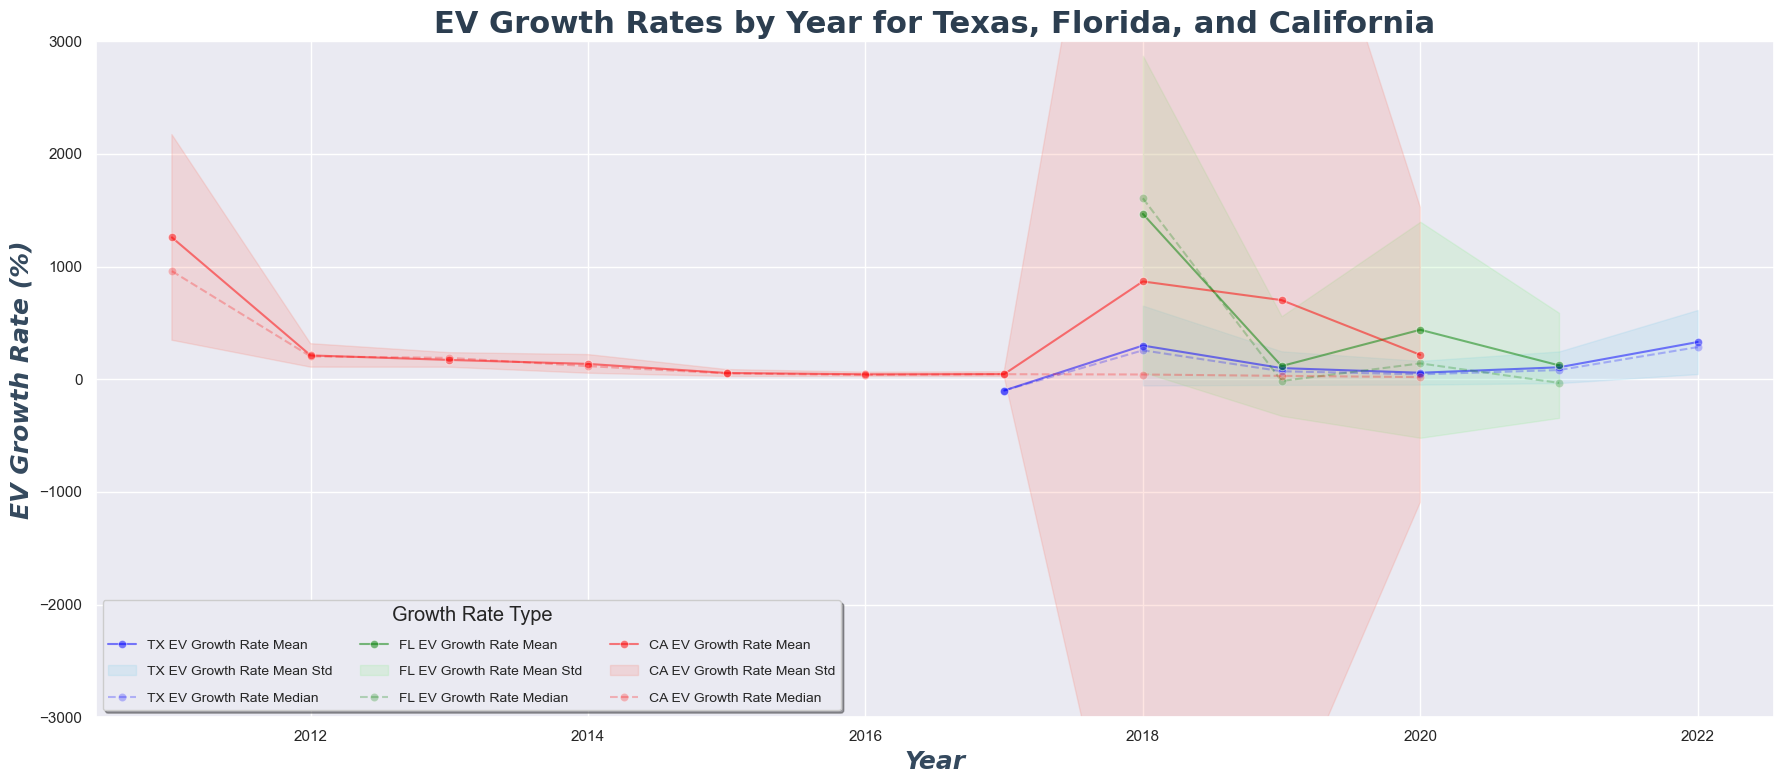

In [15]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))


# Plot EV Growth Rates
ax = plot_growth_rates(
    df=tx_df,
    ax=ax,
    x='year',
    y_mean='EV Growth Rate Mean',
    y_median='EV Growth Rate Median',
    y_std='EV Growth Rate Std',
    title="EV Growth Rates by Year for Texas, Florida, and California",
    x_label='Year',
    y_label='EV Growth Rate (%)',
    mean_color='blue',
    median_color='blue',
    std_color='skyblue',
    state_name='TX'
)

ax = plot_growth_rates(
    df=fl_df,
    ax=ax,
    x='year',
    y_mean='EV Growth Rate Mean',
    y_median='EV Growth Rate Median',
    y_std='EV Growth Rate Std',
    title="EV Growth Rates by Year for Texas, Florida, and California",
    x_label='Year',
    y_label='EV Growth Rate (%)',
    mean_color='green',
    median_color='green',
    std_color='lightgreen',
    state_name='FL'
)

ax = plot_growth_rates(
    df=ca_df,
    ax=ax,
    x='year',
    y_mean='EV Growth Rate Mean',
    y_median='EV Growth Rate Median',
    y_std='EV Growth Rate Std',
    title="EV Growth Rates by Year for Texas, Florida, and California",
    x_label='Year',
    y_label='EV Growth Rate (%)',
    mean_color='red',
    median_color='red',
    std_color='salmon',
    state_name='CA'
)

# Set y limit of figure to 3000 to -3000 
plt.ylim(-3000, 3000)


# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Save the plot
file_name = f"ev_county_central_tendency.png"
file_path = Path(f"../../../../../reports/figures/growth_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()